In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd

In [2]:
exact_openmp = open('openmp/exact/exact_openmp_psc_2.txt', 'r')
scale_exact_openmp = []
core_exact_openmp = []
time_exact_openmp = []
f = exact_openmp.readlines()
for row in f:
    if row.startswith('======='):
        scale_exact_openmp.append('TSP_input_' + re.search('TSP_input_(\d+?).txt', row).groups()[0])
        core_exact_openmp.append(re.search('Thread: (\d+?) ==', row).groups()[0])
    if row.startswith('Computation Time'):
        time_exact_openmp.append(float(re.search('Time: (.+)\.', row).groups()[0]))
for i, v in enumerate(time_exact_openmp):
    if i % 5 == 0:
        c1 = v
        time_exact_openmp[i] = 1
    else:
        speedup = c1 / v
        time_exact_openmp[i] = speedup
# scale_exact_openmp = [row + ' + OpenMP' for row in scale_exact_openmp]
core_exact_openmp = [row + ' + OpenMP' for row in core_exact_openmp]

exact_mpi = open('mpi/exact/exact_mpi_psc_2.txt', 'r')
scale_exact_mpi = []
core_exact_mpi = []
time_exact_mpi = []
f = exact_mpi.readlines()
for row in f:
    if row.startswith('======='):
        scale_exact_mpi.append('TSP_input_' + re.search('TSP_input_(\d+?).txt', row).groups()[0])
        core_exact_mpi.append(re.search('Thread: (\d+?) ==', row).groups()[0])
    if row.startswith('General computation time:'):
        time_exact_mpi.append(float(re.search('time: (.+)\.', row).groups()[0]))
for i, v in enumerate(time_exact_mpi):
    if i % 5 == 0:
        c1 = v
        time_exact_mpi[i] = 1
    else:
        speedup = c1 / v
        time_exact_mpi[i] = speedup
# scale_exact_mpi = [row + ' + MPI' for row in scale_exact_mpi]
core_exact_mpi = [row + ' + MPI' for row in core_exact_mpi]

df = pd.DataFrame({'scale': scale_exact_openmp + scale_exact_mpi, 
                   'core': core_exact_openmp + core_exact_mpi, 
                   'speedup': time_exact_openmp + time_exact_mpi})

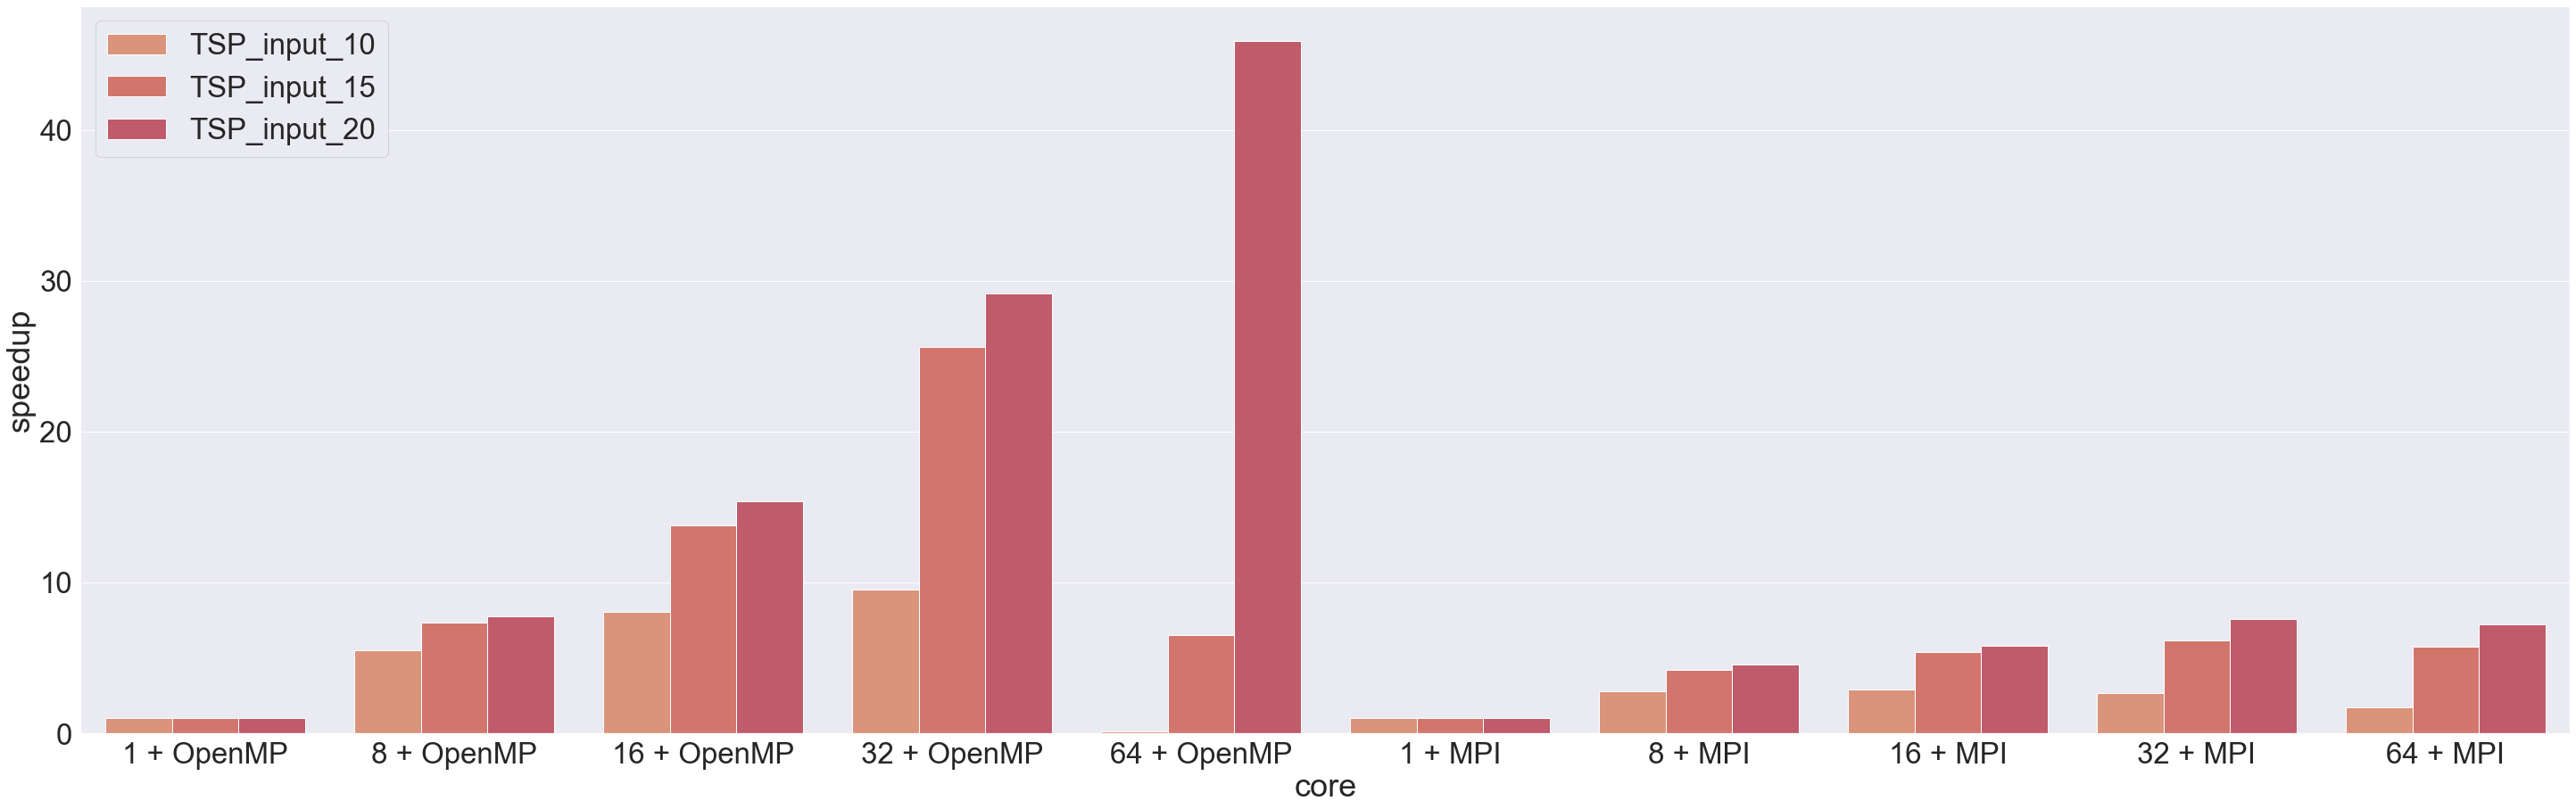

In [3]:
sns.set_theme(style="whitegrid")
sns.set(font_scale = 3, rc = {'figure.figsize':(50, 15)})
sns.barplot(x = 'core', y = 'speedup', hue = 'scale',data = df, palette=sns.color_palette("flare"))
plt.legend(loc='upper left')
plt.labelsize = 25
plt.savefig('./exact_openmp_mpi.png')

In [4]:
acs_openmp = open('openmp/acs/acs_openmp_psc_2.txt', 'r')
scale_acs_openmp = []
core_acs_openmp = []
time_acs_openmp = []
f = acs_openmp.readlines()
for row in f:
    if row.startswith('======='):
        scale_acs_openmp.append('TSP_input_' + re.search('TSP_input_(\d+?).txt', row).groups()[0])
        core_acs_openmp.append(re.search('Thread: (\d+?) ==', row).groups()[0])
    if row.startswith('Computation Time'):
        time_acs_openmp.append(float(re.search('Time: (.+)\.', row).groups()[0]))
for i, v in enumerate(time_acs_openmp):
    if i % 5 == 0:
        c1 = v
        time_acs_openmp[i] = 1
    else:
        speedup = c1 / v
        time_acs_openmp[i] = speedup
# scale_acs_openmp = [row + ' + OpenMP' for row in scale_acs_openmp]
core_acs_openmp = [row + ' + OpenMP' for row in core_acs_openmp]

acs_mpi = open('mpi/acs/acs_mpi_psc_2.txt', 'r')
scale_acs_mpi = []
core_acs_mpi = []
time_acs_mpi = []
f = acs_mpi.readlines()
for row in f:
    if row.startswith('======='):
        scale_acs_mpi.append('TSP_input_' + re.search('TSP_input_(\d+?).txt', row).groups()[0])
        core_acs_mpi.append(re.search('Thread: (\d+?) ==', row).groups()[0])
    if row.startswith('General computation time:'):
        time_acs_mpi.append(float(re.search('time: (.+)\.', row).groups()[0]))
for i, v in enumerate(time_acs_mpi):
    if i % 5 == 0:
        c1 = v
        time_acs_mpi[i] = 1
    else:
        speedup = c1 / v
        time_acs_mpi[i] = speedup
# scale_acs_mpi = [row + ' + MPI' for row in scale_acs_mpi]
core_acs_mpi = [row + ' + MPI' for row in core_acs_mpi]

df = pd.DataFrame({'scale': scale_acs_openmp + scale_acs_mpi, 
                   'core': core_acs_openmp + core_acs_mpi, 
                   'speedup': time_acs_openmp + time_acs_mpi})

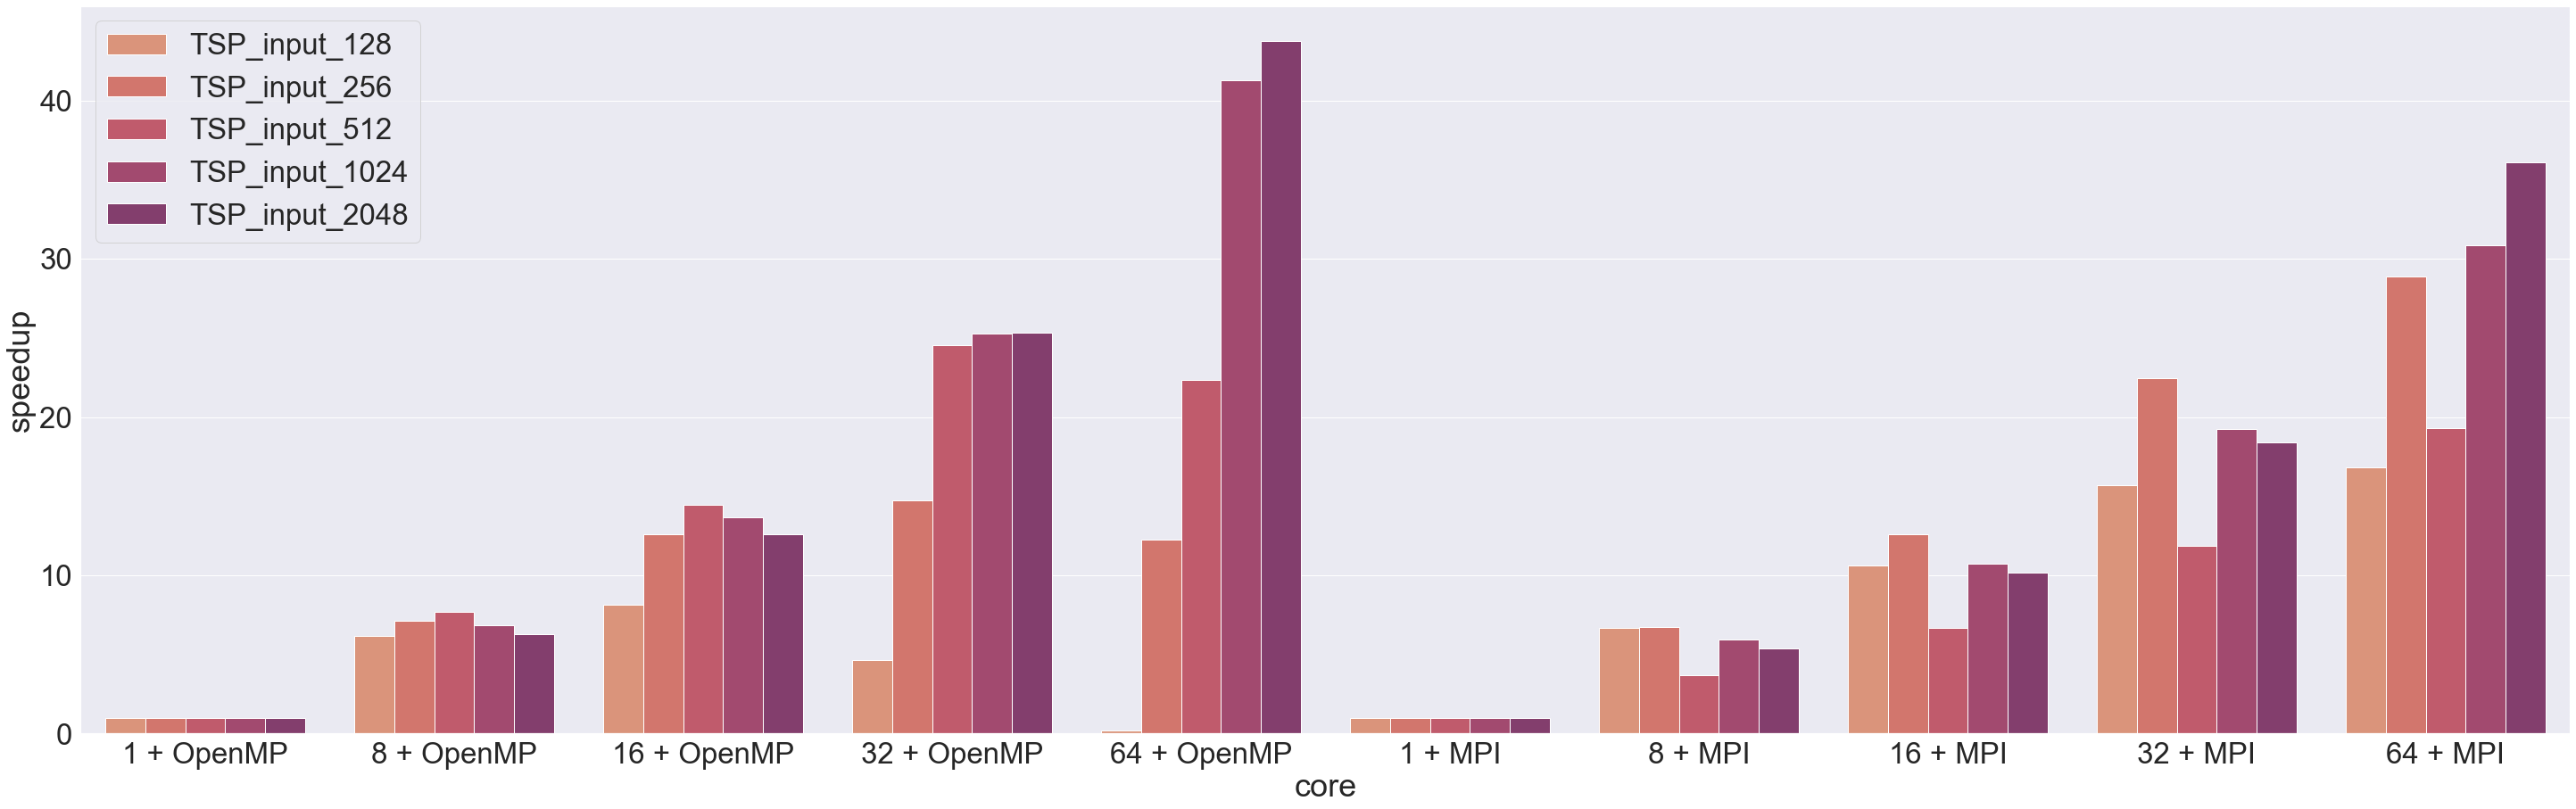

In [5]:
sns.set_theme(style="whitegrid")
sns.set(font_scale = 3, rc = {'figure.figsize':(50, 15)})
sns.barplot(x = 'core', y = 'speedup', hue = 'scale', data = df, palette=sns.color_palette("flare"))
plt.legend(loc='upper left')
plt.labelsize = 25
plt.savefig('./acs_openmp_mpi.png')